In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [2]:
# Первичный отсмотр данных
display(students.head(5))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [3]:
# анализируем числовые данные
def get_stat_number(column, n):
    median = students[column].median()
    IQR = students[column].quantile(0.75) - students[column].quantile(0.25)
    perc25 = students[column].quantile(0.25)
    perc75 = students[column].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), 'медиана: {},'.format(median), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    students[column].loc[students[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=n, range=(students[column].min(), students[column].max()),
                                                                                            label='IQR')
    students[column].loc[(students[column] >= perc75 + 1.5*IQR) | (students[column] <= perc25 - 1.5*IQR)].hist(alpha=0.5, bins=n, range=(students[column].min(), students[column].max()),
                                                                                                               label='Выбросы')
    plt.legend()

In [4]:
# анализируем числовые данные
# анализируем score
display(students['score'].value_counts(dropna=False)
        ), students.loc[:, ['score']].info()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
score    389 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


(None, None)

In [5]:
# уберем строке, где score отсутствует и изменим тип на integer
students = students.loc[students.score >= 0]
students['score'] = students.score.apply(lambda x: int(x))

25-й перцентиль: 40.0, медиана: 55.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


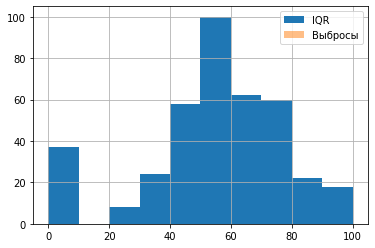

In [6]:
# распределение score
get_stat_number('score',10)

In [7]:
# уберем лишний столбец studytime, granular
students.drop(['studytime, granular'], inplace = True, axis = 1)

25-й перцентиль: 16.0, медиана: 17.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


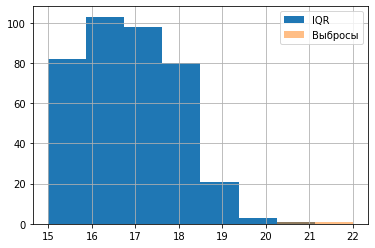

In [8]:
# столбец age
get_stat_number('age',8)

In [9]:
# столбец absences
display(students['absences'].value_counts(dropna=False)), students.loc[:, ['absences']].info()

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
NaN       11
16.0       7
3.0        7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
absences    378 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


(None, None)

25-й перцентиль: 0.0, медиана: 4.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


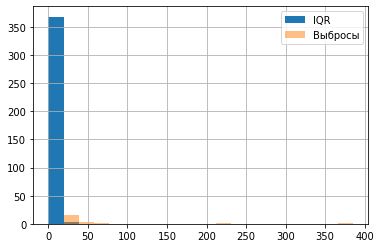

In [10]:
# заменим отсутствующие значения на 0
students['absences'] = students.absences.apply(lambda x: 0 if pd.isna(x) else int(x))
get_stat_number('absences',20)

In [11]:
#def transform_number_to_text(x):
#    return str(x)
#
#
#for c in ('Medu', 'Fedu', 'traveltime', 'studytime', 'freetime', 'goout', 'health'):
#    students[c]=students[c].apply(transform_number_to_text)

In [12]:
# посмотрим на категориальные данные
for c in ('school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic','Medu', 'Fedu', 'traveltime', 'studytime', 'freetime', 'goout', 'health'):
    print(display(students[c].value_counts(dropna=False)), students.loc[:, [c]].info())

GP    344
MS     45
Name: school, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
school    389 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


F    204
M    185
Name: sex, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
sex    389 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


U      291
R       83
NaN     15
Name: address, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
address    374 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


GT3    255
LE3    107
NaN     27
Name: famsize, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
famsize    362 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


T      308
NaN     45
A       36
Name: Pstatus, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    344 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


other       127
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
Mjob    370 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


other       194
services     99
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
Fjob    353 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


course        135
reputation    102
home          101
other          34
NaN            17
Name: reason, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
reason    372 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


mother    248
father     86
NaN        31
other      24
Name: guardian, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
guardian    358 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


no     331
yes     49
NaN      9
Name: schoolsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    380 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


yes    216
no     135
NaN     38
Name: famsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
famsup    351 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


no     197
yes    153
NaN     39
Name: paid, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
paid    350 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


yes    192
no     183
NaN     14
Name: activities, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
activities    375 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


yes    297
no      77
NaN     15
Name: nursery, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
nursery    374 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


yes    350
NaN     20
no      19
Name: higher, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
higher    369 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


yes    300
no      55
NaN     34
Name: internet, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
internet    355 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


no     235
yes    123
NaN     31
Name: romantic, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
romantic    358 non-null object
dtypes: object(1)
memory usage: 6.1+ KB
None None


4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
NaN      3
Name: Medu, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
Medu    386 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB
None None


2.0     105
3.0      94
4.0      88
1.0      75
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
Fedu    365 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB
None None


1.0    239
2.0     94
NaN     28
3.0     21
4.0      7
Name: traveltime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
traveltime    361 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB
None None


2.0    189
1.0    103
3.0     63
4.0     27
NaN      7
Name: studytime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
studytime    382 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB
None None


3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
NaN      9
Name: freetime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
freetime    380 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB
None None


3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
NaN      7
Name: goout, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
goout    382 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB
None None


5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
NaN     15
Name: health, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
health    374 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB
None None


In [13]:
# Исправим ошибки в Fedu - 40 заменим на 4, NaN на 0
students['Fedu'] = students.apply(lambda x: str(
    "0.0") if x.Fedu == "nan" else str(x.Fedu), axis=1)
students['Fedu'] = students.apply(
    lambda x: "4.0" if x.Fedu == "40.0" else str(x.Fedu), axis=1)

# Исправим ошибки в Mjob NaN на other
students['Mjob'] = students.apply(
    lambda x: "other" if pd.isna(x.Mjob) else x.Mjob, axis=1)

# Исправим ошибки в Mjob NaN на other
students['Fjob'] = students.apply(
    lambda x: "other" if pd.isna(x.Fjob) else x.Fjob, axis=1)

# Исправим ошибки в reason NaN на other
students['reason'] = students.apply(
    lambda x: "other" if pd.isna(x.reason) else x.reason, axis=1)

# Исправим ошибки в reason NaN на other
students['guardian'] = students.apply(
    lambda x: "other" if pd.isna(x.guardian) else x.guardian, axis=1)

# Исправим ошибки в failures заменим NaN на 0
students['failures'] = students.failures.apply(
    lambda x: 0 if pd.isna(x) else int(x))

# Исправим ошибки в famrel: -1 заменим на 1, NaN на медиану
students['famrel'] = students.apply(
    lambda x: 4 if pd.isna(x.famrel) else int(x.famrel), axis=1)
students['famrel'] = students.apply(
    lambda x: 1 if x.famrel == -1 else int(x.famrel), axis=1)

# Исправим ошибки в Medu : заменим NaN на 0
students['Medu'] = students.apply(
    lambda x: '0.0' if x.Medu == 'nan' else str(x.Medu), axis=1)

# изменим тип traveltime  на строковый
students['traveltime'] = students.apply(lambda x: str(x))

# изменим тип studytime  на строковый
students['studytime'] = students.apply(lambda x: str(x))

# изменим тип famrel  на строковый
students['famrel'] = students.apply(lambda x: str(x))

# изменим тип freetime  на строковый
students['freetime'] = students.apply(lambda x: str(x))

# изменим тип goout  на строковый
students['goout'] = students.apply(lambda x: str(x))

# изменим тип health  на строковый
students['health'] = students.apply(lambda x: str(x))

In [14]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic','Medu', 'Fedu', 'traveltime', 'studytime', 'freetime', 'goout', 'health']:
    print(get_stat_dif(col))

None
None
Найдены статистически значимые различия для колонки address
None
None
None
Найдены статистически значимые различия для колонки Mjob
None
None
None
None
None
None
None
None
None
Найдены статистически значимые различия для колонки higher
None
None
Найдены статистически значимые различия для колонки romantic
None
Найдены статистически значимые различия для колонки Medu
None
None
None
None
None
None
None


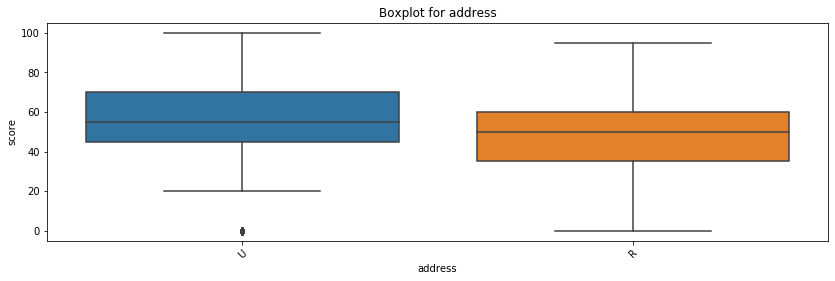

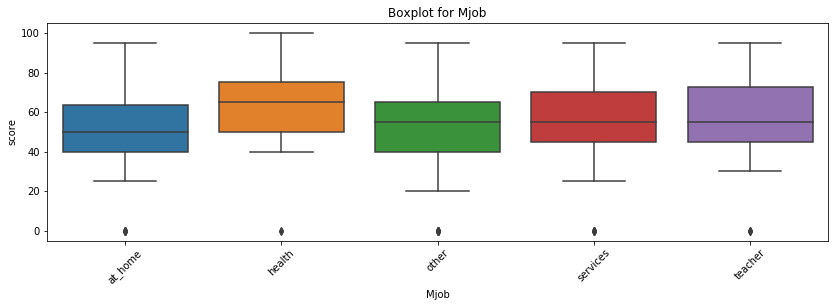

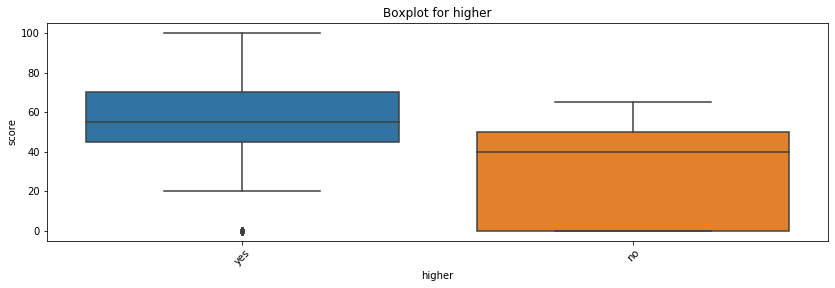

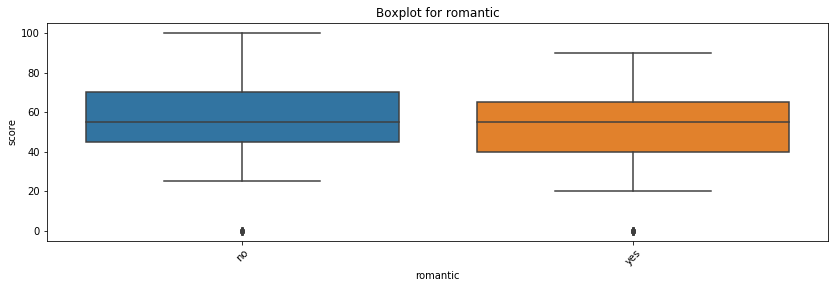

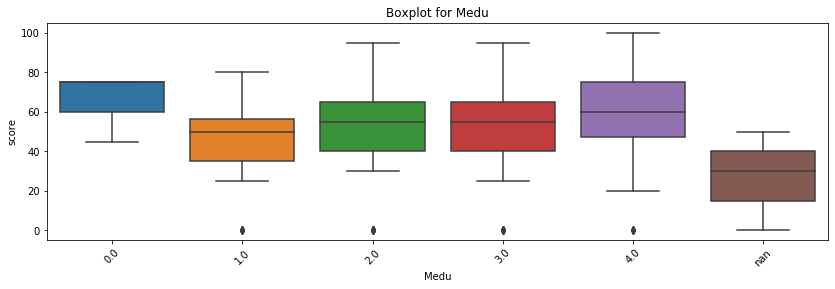

In [15]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in ['address', 'Mjob', 'higher', 'romantic', 'Medu']:
    get_boxplot(col)

In [16]:
students.corr()

,age,failures,absences,score
age,1.000000,0.206279,0.095166,-0.155726
failures,0.206279,1.000000,0.056706,-0.337187
absences,0.095166,0.056706,1.000000,0.060932
score,-0.155726,-0.337187,0.060932,1.000000


In [17]:
students_for_model = students.loc[:, ['address', 'Mjob', 'higher', 'romantic', 'Medu', 'age', 'failures','score']]
students_for_model.head()

,address,Mjob,higher,romantic,Medu,age,failures,score
0,U,at_home,yes,no,4.0,18,0,30
1,U,at_home,yes,no,1.0,17,0,30
2,U,at_home,yes,NaN,1.0,15,3,50
3,U,health,yes,yes,4.0,15,0,75
4,U,other,yes,no,3.0,16,0,50
